In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#LEEMOS DATOS BOW
X_tfidf=pd.read_csv("C:/Users/daniela.andaluz/Downloads/X_tfidf.csv")

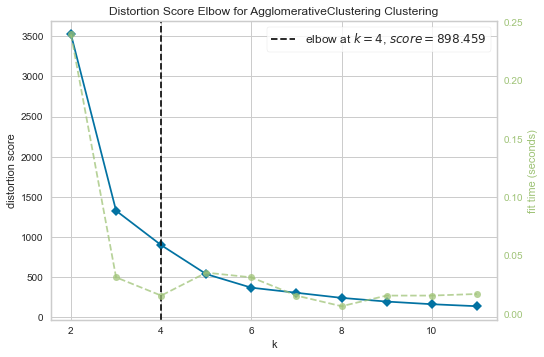

In [3]:
#Elbow method
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X_tfidf)       
visualizer.show()   


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


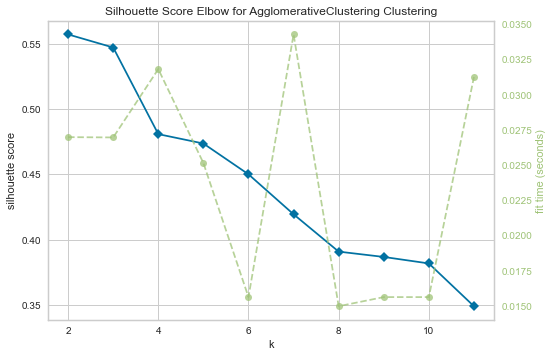

In [4]:
#Silhouette method
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X_tfidf)       
visualizer.show()   


In [5]:
#Clusterizamos
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering= AgglomerativeClustering(n_clusters =4 )
AgglomerativeClustering_indices = AgglomerativeClustering.fit_predict(X_tfidf)

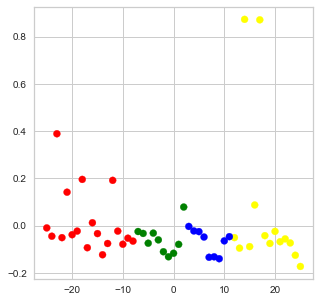

In [6]:
#Visualizamos
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X_tfidf)

colors = ['red', 'green','yellow','blue']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in AgglomerativeClustering_indices])



In [7]:
X=pd.read_csv("C:/Users/daniela.andaluz/Downloads/X_tfidf_index.csv")
X['agnes']=AgglomerativeClustering_indices
X.to_csv("C:/Users/daniela.andaluz/Downloads/X_tfidf_index.csv")